In [142]:
!wget -c "http://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"

--2019-04-25 18:41:15--  http://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: 'AirQualityUCI.zip'

AirQualityUCI.zip   100%[===================>]   1.47M  1.57MB/s    in 0.9s    

2019-04-25 18:41:16 (1.57 MB/s) - 'AirQualityUCI.zip' saved [1543989/1543989]



In [143]:
!unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [349]:
# http://archive.ics.uci.edu/ml/datasets/air+quality

In [498]:
!cat AirQualityUCI.csv 

In [144]:
import csv
import time
import datetime
import numpy as np
features_dict = {
    
}
features_wanted = ["CO(GT)", "T", "NOx(GT)", "NO2(GT)", "RH", "AH"]
output_features = ["T"]
window_size = 50
    
with open("AirQualityUCI.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';') 
    
    for feature in features_wanted:
        features_dict[feature] = []
    
    for row in csv_reader:
        for feature in features_wanted:
            if(len(row[feature]) == 0):
                features_dict[feature].append(0)
            else:
                features_dict[feature].append(float(row[feature].replace(",", ".")))

In [104]:
features_dict["T"]

[13.6,
 13.3,
 11.9,
 11.0,
 11.2,
 11.2,
 11.3,
 10.7,
 10.7,
 10.3,
 10.1,
 11.0,
 10.5,
 10.2,
 10.8,
 10.5,
 10.8,
 10.5,
 9.5,
 8.3,
 8.0,
 8.3,
 9.7,
 9.8,
 10.3,
 9.7,
 9.6,
 9.1,
 8.2,
 8.2,
 8.3,
 7.7,
 7.1,
 7.0,
 6.1,
 6.3,
 6.8,
 6.4,
 7.3,
 9.2,
 13.2,
 14.3,
 15.0,
 16.1,
 16.3,
 15.8,
 15.9,
 16.9,
 15.1,
 14.4,
 12.9,
 12.1,
 11.0,
 9.7,
 9.5,
 9.1,
 8.8,
 7.8,
 7.0,
 8.3,
 7.2,
 6.3,
 6.5,
 9.6,
 12.4,
 15.6,
 18.4,
 19.4,
 18.0,
 18.4,
 17.6,
 16.7,
 16.1,
 15.8,
 15.7,
 15.3,
 14.6,
 14.7,
 13.9,
 14.6,
 12.5,
 11.6,
 12.1,
 11.5,
 11.6,
 10.4,
 11.6,
 12.4,
 14.5,
 16.9,
 19.3,
 21.2,
 21.4,
 21.9,
 22.2,
 21.3,
 19.7,
 18.4,
 17.6,
 16.7,
 16.3,
 14.7,
 14.8,
 14.0,
 13.4,
 12.6,
 12.3,
 11.9,
 11.4,
 11.3,
 12.4,
 14.8,
 17.4,
 19.8,
 22.0,
 23.3,
 23.9,
 24.4,
 24.4,
 23.8,
 22.5,
 20.4,
 18.3,
 16.7,
 15.7,
 15.3,
 14.1,
 14.8,
 14.8,
 13.6,
 12.3,
 12.8,
 11.2,
 11.0,
 11.7,
 13.6,
 17.8,
 21.4,
 24.4,
 25.3,
 25.8,
 27.0,
 28.2,
 28.0,
 23.9,
 21.3,
 20.4,
 19

In [105]:
def make_data_window():
    global features_wanted
    global features_dict
    
    data_points = features_dict[features_wanted[0]]
    results_x = np.zeros((len(data_points),len(features_wanted), window_size))
    results_y = np.zeros((len(data_points),len(output_features)))
    for feature_index, feature in enumerate(features_wanted):
        target_feature_index = None
        if(feature in output_features):
            target_feature_index = output_features.index(feature)
        for data_point_index in range(len(features_dict[feature]) - window_size - 1):
            window = features_dict[feature][data_point_index:data_point_index + 50]
            #if(len(window) == 50):
            results_x[data_point_index,feature_index,:] = window               
            if(target_feature_index != None):
                    results_y[data_point_index,target_feature_index] = features_dict[feature][data_point_index + 51]
       
    return results_x, results_y
X, y = make_data_window()

In [106]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [107]:
def min_max_normalize(x, y):
    x_min_f = np.min(x)
    x_max_f = np.max(x)
    X  = (x-x_min_f)/(x_max_f-x_min_f)
    
    y_min_f = np.min(y)
    y_max_f = np.max(y)
    Y  = (y-y_min_f)/(y_max_f-y_min_f)

    return X, Y

In [108]:
X_norm, y_norm = min_max_normalize(X, y)

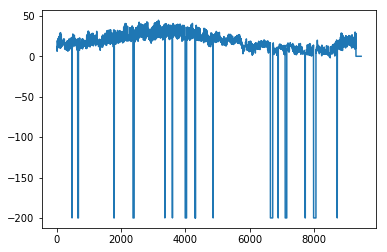

In [109]:
plt.plot(y)

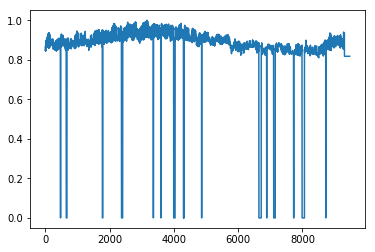

In [110]:
plt.plot(y_norm)

In [111]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras import optimizers

from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [112]:
type(y_norm)

numpy.ndarray

In [115]:
X_norm = X_norm.reshape(X_norm.shape[0], window_size, len(features_wanted))

In [118]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=len(features_wanted), activation='relu', input_shape=(window_size, len(features_wanted)) ))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_norm, y_norm, epochs=10)

Epoch 1/10
9471/9471 [==============================] - 1s 110us/step - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 2/10
9471/9471 [==============================] - 1s 76us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 3/10
9471/9471 [==============================] - 1s 73us/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 4/10
9471/9471 [==============================] - 1s 71us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/10
9471/9471 [==============================] - 1s 72us/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 6/10
9471/9471 [==============================] - 1s 72us/step - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 7/10
9471/9471 [==============================] - 1s 68us/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 8/10
9471/9471 [==============================] - 1s 70us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 9/10
9471/9471 [==============================] - 1s 72us/step - loss: 0.0059 - mean_squa

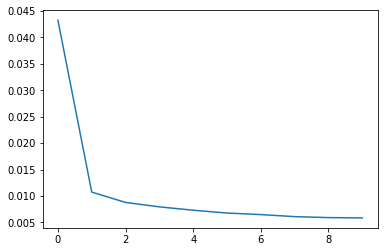

In [119]:
plt.plot(history.history["mean_squared_error"], label="accuracy")

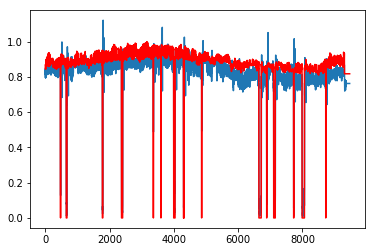

In [121]:
def check_model(x, true_y):
    plt.plot(model.predict(x))
    plt.plot(true_y, color="red")
check_model(X_norm, y_norm)

9471/9471 [==============================] - 0s 34us/step


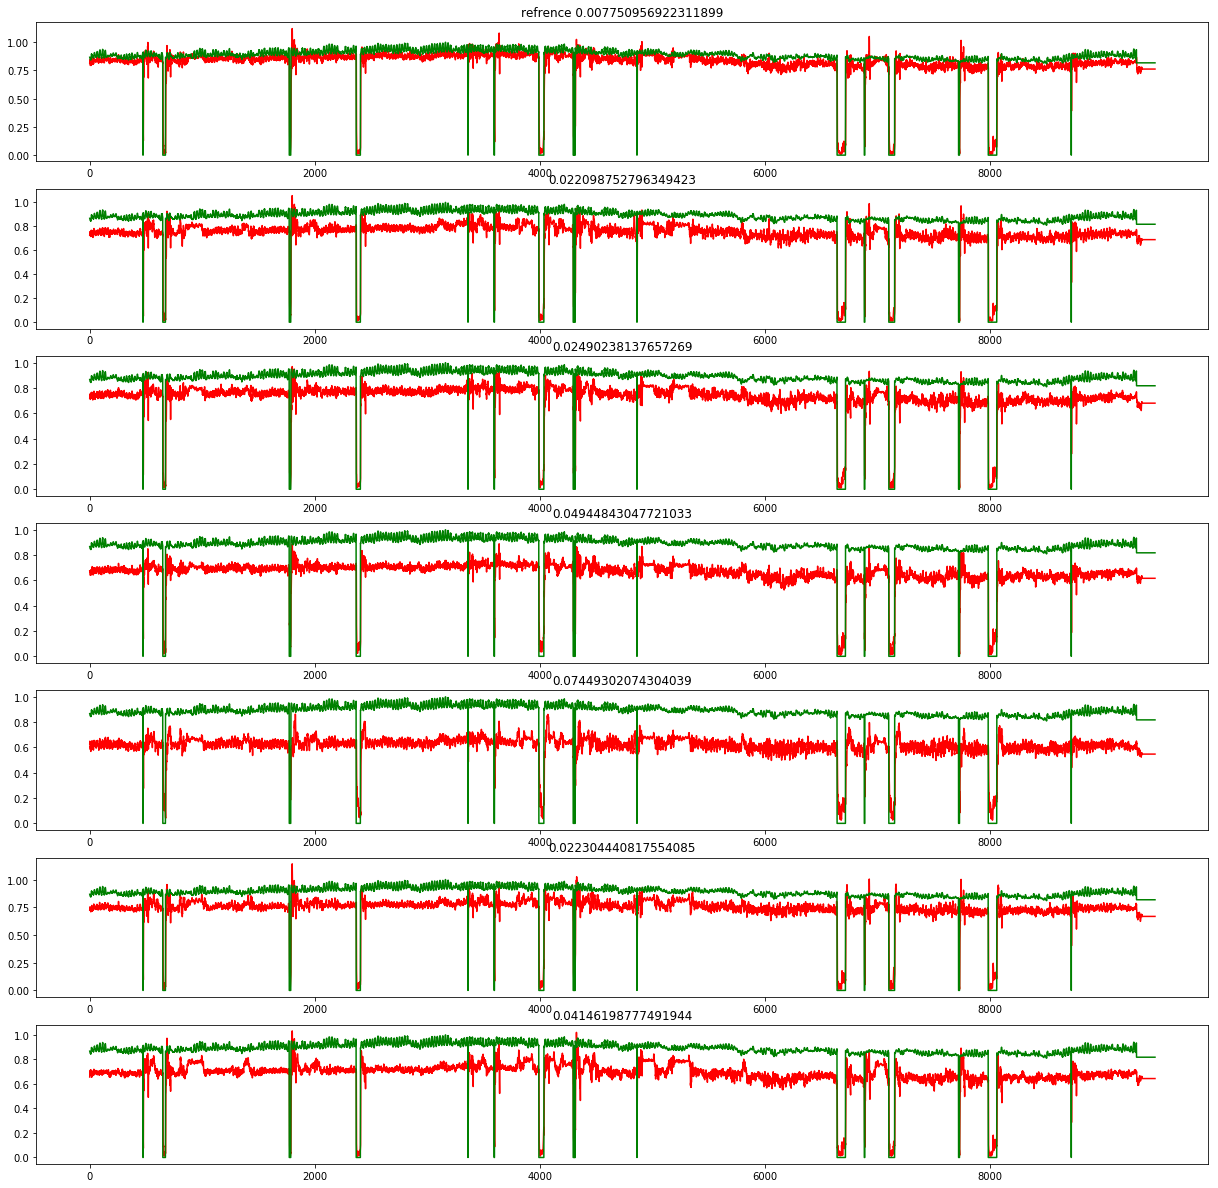

In [143]:
def zero_each_feature(x, y, size):
    figure, axes = plt.subplots(size + 1, 1, figsize=(21, 21))

    _, mse = model.evaluate(x, y)
    axes[0].set_title("refrence {}".format(mse))
    axes[0].plot(model.predict(x), color="red")
    axes[0].plot(y, color="green")

    for i in range(size):
        copy_traing = x.copy()
        copy_traing[:, :, i] = 0
        _, mse = model.evaluate(copy_traing, y)
        axes[i + 1].set_title(mse)
        axes[i + 1].plot(model.predict(copy_traing), color="red")
        axes[i + 1].plot(y, color="green")
    
zero_each_feature(X_norm, y_norm,  len(features_wanted))

In [168]:
# adding random data

In [164]:
new_x = X_norm.copy()

In [165]:
new_x[:, :, -1] = np.random.randint(2, size=X_norm.shape[0]*X_norm.shape[1]).reshape(X_norm.shape[0], X_norm.shape[1])

9471/9471 [==============================] - 0s 34us/step


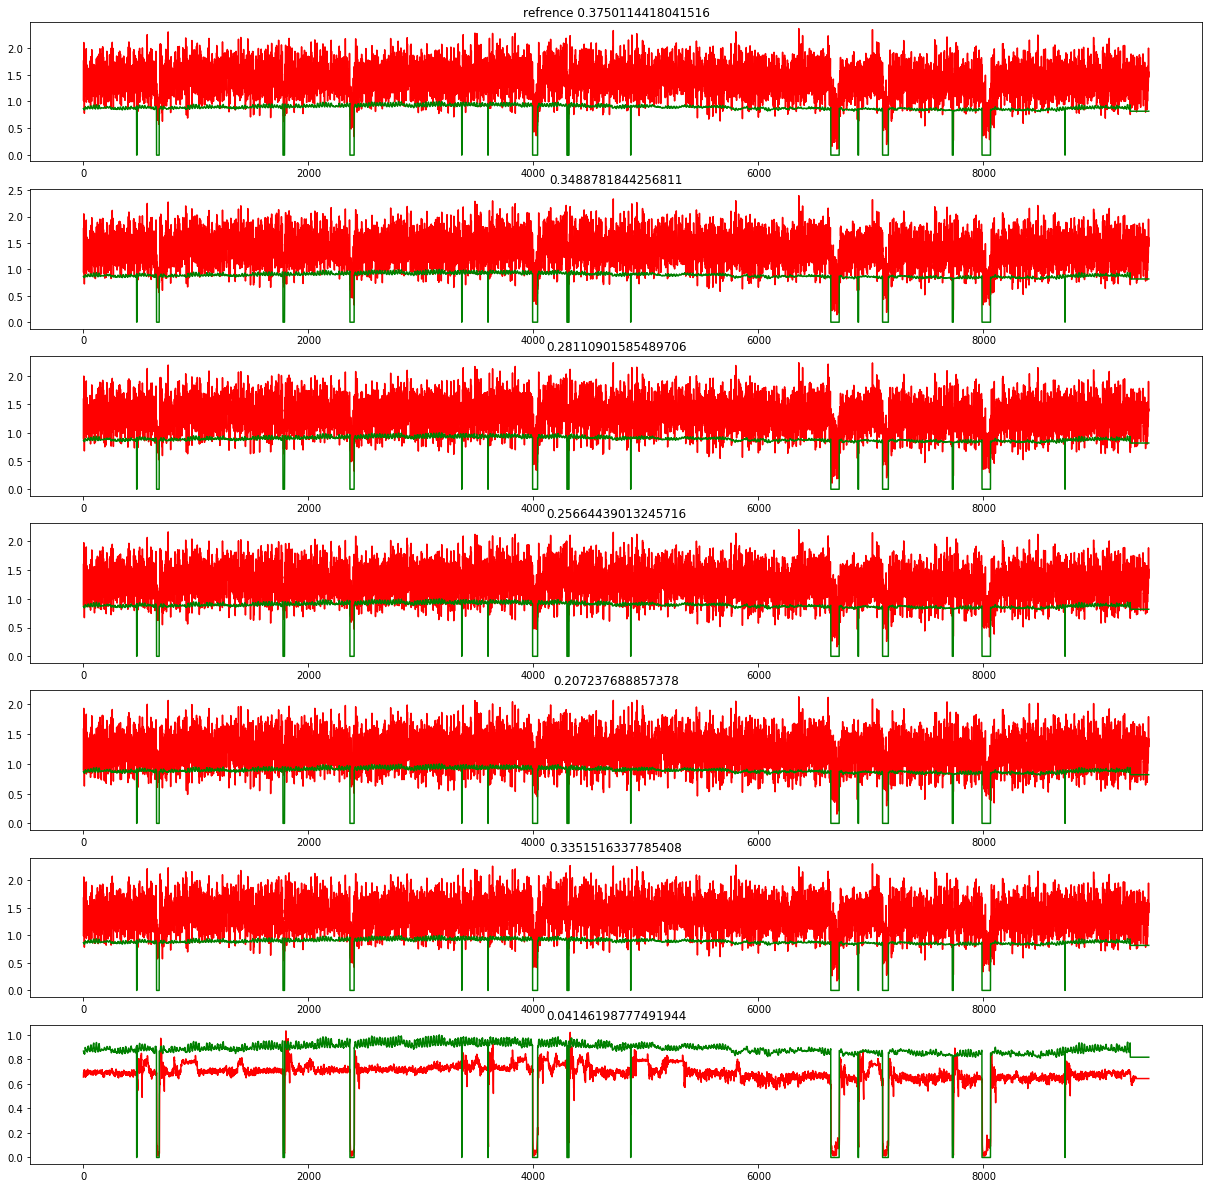

In [167]:
zero_each_feature(new_x, y_norm,  len(features_wanted))